                                            image_path  label  label_name  \
126  /content/flower_photos_new/004.sunflowers/004_...      3  sunflowers   

                                               heatmap  
126  cnumpy.core.multiarray\n_reconstruct\np1\n(cnu...  

----Result----
/Users/Miyeah/Downloads/flower_photos_new/004.sunflowers/004_0328.jpg
sunflowers
[[0.01660924 0.01733003 0.01805081 ... 0.01434918 0.01434918 0.01434918]
 [0.01835913 0.01925107 0.02014299 ... 0.01418852 0.01418852 0.01418852]
 [0.02010903 0.0211721  0.02223518 ... 0.01402786 0.01402786 0.01402786]
 ...
 [0.02107009 0.02167566 0.02228122 ... 0.00724952 0.00724952 0.00724952]
 [0.02107009 0.02167566 0.02228122 ... 0.00724952 0.00724952 0.00724952]
 [0.02107009 0.02167566 0.02228122 ... 0.00724952 0.00724952 0.00724952]]


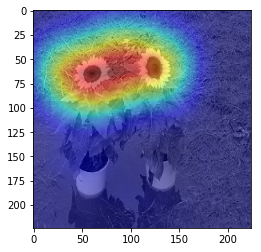

In [2]:
import pandas as pd
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.transform

# NOTES: 请注意39行

# 以哥大邮箱身份查看以下共享文件
# 原始图片数据集:
# https://drive.google.com/file/d/1HRTIVM6lyalQuF07V2eKywwMA5BJcSJh/view?usp=sharing
# Test最终pickle
# https://drive.google.com/file/d/1n0ilgTl5ODQslNTQ0L2SVX7nfEpZrtiG/view?usp=sharing
# Train最终pickle
# https://drive.google.com/file/d/1m8DlDpvhtie8tjd4TS9O-n0Miw0KxfSp/view?usp=sharing

def load_image( path ):
    try:
        img = skimage.io.imread( path )
    except Exception as e:
        print(e)
        return None

    img = skimage.color.rgb2lab(img)
    # 生成灰度图
    img[:,:,2] = 0
    img[:,:,1] = 0
    img = skimage.color.lab2rgb(img)

    if img is None: return None
    if len(img.shape) < 2: return None
    if len(img.shape) == 4: return None
    if len(img.shape) == 2: img=np.tile(img[:,:,None], 3)
    if img.shape[2] == 4: img=img[:,:,:3]
    if img.shape[2] > 4: return None

    #TODO: ！！提醒zxy 修改自己的代码 两边resize逻辑不一样 换成这个吧！！
    resized_img = skimage.transform.resize( img, [224,224] , mode='constant')
    return resized_img


#以下为用法

#NOTES: 35 test samples per class, 175 test samples in total
#NOTES: 699 train samples per class, 3495 train samples in total
data = pd.read_pickle("/Users/Miyeah/Downloads/testset-final.pickle")
#data = pd.read_pickle("/Users/Miyeah/Downloads/trainset-final.pickle")

#图片序号 可以自行更改看效果
record_idx = 126
record = data[record_idx:record_idx+1]
print(record)
#修改flower_photos_new文件夹前缀地址
path = record["image_path"].values[0].replace("/content/","/Users/Miyeah/Downloads/")
label_name = record["label_name"].values[0]
raw = record["heatmap"].values[0]
heatmap = cPickle.loads(bytes(raw, "utf-8"), encoding="bytes")
print()
print("----Result----")
print(path)
print(label_name)
#热力图原始数据
print(heatmap)
img = load_image(path)
plt.imshow(img)
plt.imshow( heatmap, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
plt.show()